<a href="https://colab.research.google.com/github/melivadu/INTEGRA/blob/main/MultiReg_MVD_GitHub_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Información del dataset

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [58]:
!git clone "https://github.com/melivadu/INTEGRA.git"

Cloning into 'INTEGRA'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 40 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [61]:
datos = pd.read_excel('/content/INTEGRA/datos.xlsx', sheet_name='Proyección 1')
datos.head()

,Año,CE_Total,Pob_Total,T_PIB
0,2006,40157.27,42170126,200.304411
1,2007,41455.11,42658630,213.801312
2,2008,45536.55,43134017,220.821363
3,2009,46642.45,43608630,223.337951
4,2010,48228.13,44086292,233.376230


In [62]:
datosAj = datos.iloc[:15]
datosAj.describe()

,Año,CE_Total,Pob_Total,T_PIB
count,15.000000,15.000000,1.500000e+01,15.000000
mean,2013.000000,52559.972501,4.567356e+07,265.802666
std,4.472136,7194.085682,2.446675e+06,39.847657
min,2006.000000,40157.270000,4.217013e+07,200.304411
25%,2009.500000,47435.290000,4.384746e+07,228.357091
50%,2013.000000,53525.300000,4.543494e+07,272.671892
75%,2016.500000,57806.849700,4.712466e+07,299.511976
max,2020.000000,63697.701100,5.037242e+07,321.556325


# 2. Análisis entre variables

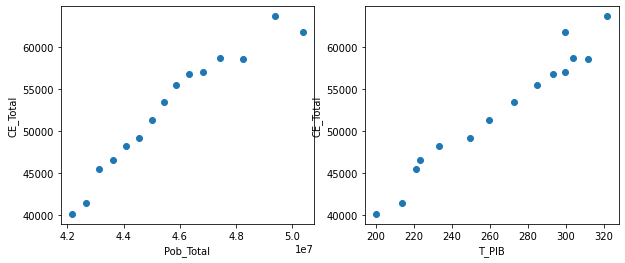

In [63]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].scatter(datosAj['Pob_Total'], datosAj['CE_Total'])
ax[0].set_xlabel('Pob_Total')
ax[0].set_ylabel('CE_Total');
ax[1].scatter(datosAj['T_PIB'], datosAj['CE_Total'])
ax[1].set_xlabel('T_PIB')
ax[1].set_ylabel('CE_Total');

Correlación

In [64]:
datosCorr = datosAj[['CE_Total','Pob_Total','T_PIB']].corr()
datosCorr

,CE_Total,Pob_Total,T_PIB
CE_Total,1.000000,0.965414,0.979379
Pob_Total,0.965414,1.000000,0.930777
T_PIB,0.979379,0.930777,1.000000


# 3. Regresión con múltiples modelos

In [65]:
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lars

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

In [66]:
# Datos de ajuste
X = datosAj[['Pob_Total','T_PIB']]
Y = datosAj['CE_Total']

1. Linear regression

In [67]:
linearMod = LinearRegression(normalize=True).fit(X, Y)
y_aj = linearMod.predict(X)
print('Fit score_R2: ', r2_score(Y, y_aj))
print('Fit score_MAPE: ', mean_absolute_percentage_error(Y, y_aj))

Fit score_R2:  0.9808650161995528
Fit score_MAPE:  0.01561436420804582


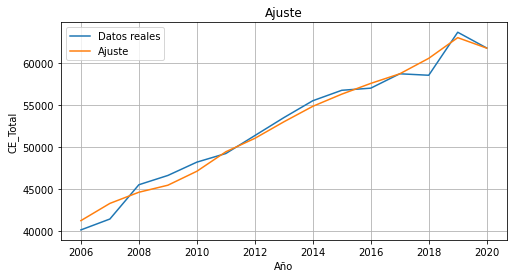

In [68]:
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(datosAj['Año'], Y, label='Datos reales')
plt.plot(datosAj['Año'], y_aj, label='Ajuste')
plt.xlabel('Año')
plt.ylabel('CE_Total')
plt.title('Ajuste');
ax.legend();
plt.grid(True)

*2. Lasso regression*

In [69]:
parameters = {'alpha': np.logspace(2, 3, 100)}
grid_search = GridSearchCV(Lasso(), parameters, cv=3, return_train_score=False)
grid_search.fit(X, Y);
print(f"Mejor parámetro = {grid_search.best_params_}")

Mejor parámetro = {'alpha': 497.7023564332114}


In [70]:
lassoMod = Lasso(alpha=grid_search.best_params_['alpha']).fit(X, Y)
y_aj = lassoMod.predict(X)
print('Fit score_R2: ', r2_score(Y, y_aj))
print('Fit score_MAPE: ', mean_absolute_percentage_error(Y, y_aj))

Fit score_R2:  0.9808391260027698
Fit score_MAPE:  0.015781363625249515


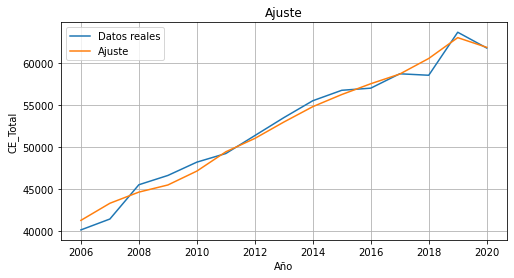

In [71]:
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(datosAj['Año'], Y, label='Datos reales')
plt.plot(datosAj['Año'], y_aj, label='Ajuste')
plt.xlabel('Año')
plt.ylabel('CE_Total')
plt.title('Ajuste');
ax.legend();
plt.grid(True)

3. Ridge regression

In [ ]:
parameters = {'alpha': np.logspace(-1, 0, 100)}
grid_search = GridSearchCV(Ridge(normalize=True), parameters, cv=3, return_train_score=False)
grid_search.fit(X, Y);
print(f"Mejor parámetro = {grid_search.best_params_}")

Mejor parámetro = {'alpha': 0.26560877829466867}


In [ ]:
ridgeMod = Ridge(alpha=grid_search.best_params_['alpha'], normalize=True).fit(X, Y)
y_aj = ridgeMod.predict(X)
print('Fit score_R2: ', r2_score(Y, y_aj))
print('Fit score_MAPE: ', mean_absolute_percentage_error(Y, y_aj))

Fit score_R2:  0.9656549784347708
Fit score_MAPE:  0.019593364190873215


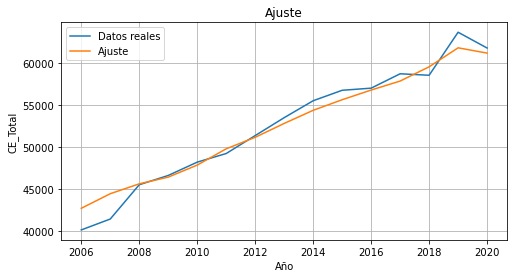

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(datosAj['Año'], Y, label='Datos reales')
plt.plot(datosAj['Año'], y_aj, label='Ajuste')
plt.xlabel('Año')
plt.ylabel('CE_Total')
plt.title('Ajuste');
ax.legend();
plt.grid(True)

4. ElasticNet regression

In [ ]:
parameters = {'alpha': np.logspace(2, 3, 100), 'l1_ratio': np.logspace(-1, 1, 100)}
grid_search = GridSearchCV(ElasticNet(normalize=False, max_iter= 100000, warm_start= True), parameters, cv=3, return_train_score=False)
grid_search.fit(X, Y);
print(f"Mejores parámetros = {grid_search.best_params_}")

Mejores parámetros = {'alpha': 509.413801481638, 'l1_ratio': 0.9770099572992254}


In [ ]:
elasticMod = ElasticNet(alpha=grid_search.best_params_['alpha'], l1_ratio=grid_search.best_params_['l1_ratio'], 
                      normalize=False, max_iter= 100000, warm_start= True).fit(X, Y)
y_aj = elasticMod.predict(X)
print('Fit score_R2: ', r2_score(Y, y_aj))
print('Fit score_MAPE: ', mean_absolute_percentage_error(Y, y_aj))

Fit score_R2:  0.9805711822799736
Fit score_MAPE:  0.016242225815868237


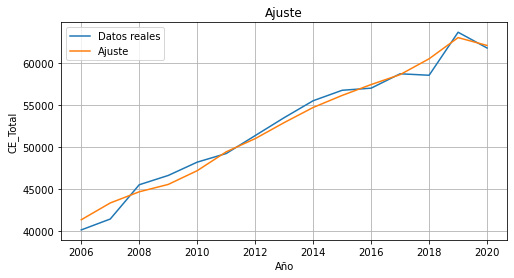

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(datosAj['Año'], Y, label='Datos reales')
plt.plot(datosAj['Año'], y_aj, label='Ajuste')
plt.xlabel('Año')
plt.ylabel('CE_Total')
plt.title('Ajuste');
ax.legend();
plt.grid(True)

5. Lars Regression

In [ ]:
parameters = {'n_nonzero_coefs': [1, 2, 3, 4, 5, 6, 7, 8]}
grid_search = GridSearchCV(Lars(), parameters, cv=3, return_train_score=False)
grid_search.fit(X, Y);
print(f"Mejor parámetro = {grid_search.best_params_}")

Mejor parámetro = {'n_nonzero_coefs': 2}


In [ ]:
larsMod = Lars(n_nonzero_coefs=grid_search.best_params_['n_nonzero_coefs']).fit(X, Y)
y_aj = larsMod.predict(X)
print('Fit score_R2: ', r2_score(Y, y_aj))
print('Fit score_MAPE: ', mean_absolute_percentage_error(Y, y_aj))

Fit score_R2:  0.9808650161995528
Fit score_MAPE:  0.015614364208045831


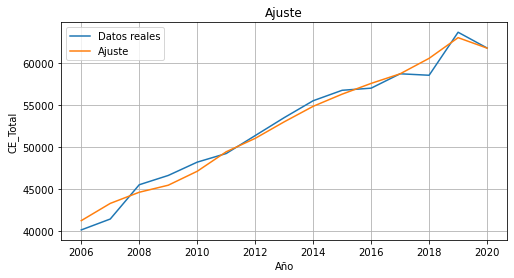

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(datosAj['Año'], Y, label='Datos reales')
plt.plot(datosAj['Año'], y_aj, label='Ajuste')
plt.xlabel('Año')
plt.ylabel('CE_Total')
plt.title('Ajuste');
ax.legend();
plt.grid(True)

# 4. Forecasting

In [72]:
pip install skforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from openpyxl import load_workbook

Año a pronosticar

In [78]:
datos = pd.read_excel('/content/INTEGRA/datos.xlsx', sheet_name='Proyección 1')
aPro = 2022

dAj = datos[datos['Año']<aPro]
dPro  = datos[datos['Año']==aPro]

Y = dAj['CE_Total']
X = dAj[['Pob_Total', 'T_PIB']]

print("Años Ajuste: "+str(dAj['Año'].min()) +"-->" +str(dAj['Año'].max())+ ", (n= "+str(len(dAj))+")")
print("Año Pronóstico: "+str(dPro['Año'].min()) +"-->" +str(dPro['Año'].max())+ ", (n= "+str(len(dPro))+")")
dPro

Años Ajuste: 2006-->2021, (n= 16)
Año Pronóstico: 2022-->2022, (n= 1)


,Año,CE_Total,Pob_Total,T_PIB
16,2022,NaN,51609474,318.8718


Recursive forecasting

In [79]:
forecaster = ForecasterAutoreg(regressor=Lasso(alpha=497.7023564332114), lags=2)
forecaster.fit(y=Y, exog=X)
forecaster

ForecasterAutoreg 
Regressor: Lasso(alpha=497.7023564332114) 
Lags: [1 2] 
Window size: 2 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['Pob_Total', 'T_PIB'] 
Training range: [0, 15] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'alpha': 497.7023564332114, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False} 
Creation date: 2022-09-21 22:08:38 
Last fit date: 2022-09-21 22:08:38 
Skforecast version: 0.4.3 

Pronóstico

In [80]:
prono = forecaster.predict(steps=len(dPro), exog=dPro[['Pob_Total', 'T_PIB']])
dPro['CE_Total'].fillna(value=prono, inplace=True)
print(dPro)

book = load_workbook('/content/INTEGRA/datos.xlsx')
wbxlsx = pd.ExcelWriter('/content/INTEGRA/datos.xlsx', engine='openpyxl') 
wbxlsx.book = book
wbxlsx.sheets = dict((ws.title, ws) for ws in book.worksheets)
dPro.to_excel(wbxlsx, sheet_name='Proyección 1', startrow=dPro.index[dPro['Año']==aPro][0]+1, header=False, index=False)
wbxlsx.save()

     Año      CE_Total  Pob_Total     T_PIB
16  2022  65174.622361   51609474  318.8718


# 5. Gráficas

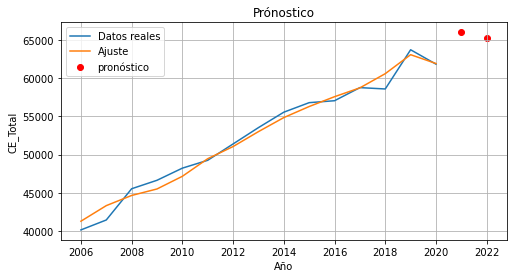

In [81]:
datos = pd.read_excel('/content/INTEGRA/datos.xlsx', sheet_name='Proyección 1')
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(datosAj['Año'], datosAj['CE_Total'], label='Datos reales')
plt.plot(datosAj['Año'], y_aj, label='Ajuste')
plt.scatter(datos['Año'][datos['Año']>=2021], datos['CE_Total'][datos['Año']>=2021], color='red', label='pronóstico')
plt.xlabel('Año')
plt.ylabel('CE_Total')
plt.title("Prónostico");
ax.legend();
plt.grid(True)